# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')


# Set the index
titanic.set_index('PassengerId', inplace=True)

# Cat variabels
cat_var = ['Name','Sex','Embarked']
for col in cat_var:
    titanic[col] = titanic[col].astype('category')


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

C:\Users\sweme\AppData\Local\Temp\ipykernel_9992\1221915374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=titanic, palette="muted")


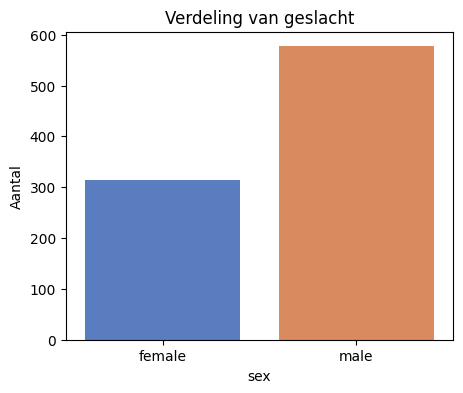

In [ ]:
# Een bar chart laat de verdeling goed zien, terwijl een pie chart handig is om de verhoudingen te begrijpen.

#Bar chart
plt.figure(figsize=(5,4))

# countplot telt automatisch hoe vaak elk label voorkomt ➝ dit getal komt op de y-as
# Matplotlib/Seaborn bepaalt de y-as als volgt:
    # Tel hoe vaak elke categorie in x="Sex" voorkomt
    # Zet dat aantal als de hoogte van de balk
    
sns.countplot(x="Sex", data=titanic, palette="muted")
plt.xlabel("sex")
plt.ylabel("Aantal")
plt.title("Verdeling van geslacht")
plt.show()



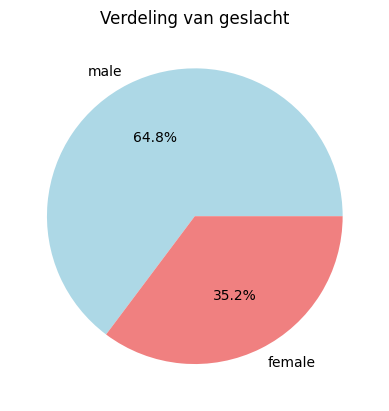

In [7]:
#Pie chart
titanic['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.ylabel('')
plt.title("Verdeling van geslacht")
plt.show()

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [ ]:
rowers = athletes[athletes["sport"] == "rowing"]

# Centrale tendens + spreiding voor lengte
print("Rowers - Lengte:")
print(rowers["ht"].describe())  # count, mean, std, min, 25%, 50%, 75%, max

# Mode voor geslacht
print("Rowers - Geslacht:")
print(rowers["sex"].mode()[0])


In [ ]:
subset2 = athletes[athletes["sport"].isin(["rowing", "netball", "tennis"])]

print("Rowers, Netball, Tennis - Lengte:")
print(subset2["ht"].describe())

print("Rowers, Netball, Tennis - Geslacht:")
print(subset2["sex"].mode()[0])


In [ ]:
subset3 = athletes[
    (athletes["sport"].isin(["basketball", "rowing"])) & (athletes["sex"] == "female")
]

print("Vrouwelijke Basketballers & Rowers - Lengte:")
print(subset3["ht"].describe())

print("Geslacht (check):")
print(subset3["sex"].mode()[0])  # zal "female" zijn, maar voor de vorm


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |